<div style="
    font-weight: bold; 
    font-size: 28px;
    ">
    Booking Cancellation Confirmation
</div>

<br>

<div style="font-size:15px; line-height:1.8">
    
**Name**: Salman Siddiqui <br>
**Email**: SalmanSiddiqui172002@gmail.com <br>

</div>

---

<div style="font-size:15px; line-height:1.8;">

**Description**

...

</div>

<h2 style="font-weight: bold; font-size: 22px;">Table of Contents</h2>

<div style="font-size:15px; line-height:1.8;">

<ol>
    <li style="margin-bottom: 8px; font-weight: bold;">Exploratory Data Analysis (EDA)</li>
    <p>
        A. Basic Overview <br>
        B. Univariate Analysis: Numerical Features <br>
        C. Univariate Analysis: Categorical Features <br>
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">Data Preprocessing</li>
    <p>
        A. Feature Selection & Engineering <br> 
        B. Handle Missing Values <br>
        C. Handle Noisy Data <br>
        D. Handle Categorical Variables <br>
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">Model Building & Comparison</li>
    <p>
        A. Decision Trees <br> 
        B. Random Forests <br>
        C. XGBoost <br>
        D. Compare Models <br>
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">Pipeline Building</li>
</ol>

</div>

---

<div style="font-size:15px; line-height:1.8;">

First, we'll start with some standard imports and add any extras as we go.

</div>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent.parent))

<div style="font-size:15px; line-height:1.8;">

We can now load our dataset and check out the features we'll be working with.

</div>

In [2]:
data_raw = pd.read_csv("../data/data.csv")

data_raw.sample(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
108320,City Hotel,0,116,2017,March,12,24,0,2,2,...,Transient-Party,100.0,0,1,Check-Out,2017-03-26,Alyssa Lee,ALee@yahoo.com,432-726-1377,************5634
97108,City Hotel,0,28,2016,September,38,11,1,0,2,...,Transient,139.0,0,1,Check-Out,2016-09-12,Virginia Munoz,Virginia.M@mail.com,875-049-4403,************2441
93926,City Hotel,0,130,2016,July,31,26,0,3,3,...,Transient,96.9,0,0,Check-Out,2016-07-29,Colin Lee,Lee_Colin62@protonmail.com,692-894-3455,************9741


<div style="font-size:15px; line-height:1.8;">

Here’s a table that summarizes the features and their meanings.

</div>

<div style="font-size:15px; line-height: 1.8;">

<table>
    <tr>
        <th>Feature</th>
        <th>Description</th>
    </tr>
    <tbody>
        <tr>
            <td>hotel</td>
            <td>Type of hotel (Resort Hotel, City Hotel)</td>
        </tr>
        <tr>
            <td>is_canceled</td>
            <td>
                Reservation cancellation status <br> 
                - 0: not canceled <br>
                - 1: canceled <br>
            </td>
        </tr>
        <tr>
            <td>...</td>
            <td>...</td>
        </tr>
    </tbody>
</table>
    
</div>

<h2 style="font-weight: bold; font-size: 22px;">1. Exploratory Data Analysis (EDA)</h2>

---

<h3 style="font-weight: bold; font-size: 18px;">A. Basic Overview</h3>

<div style="font-size:15px; line-height:1.8;">

Let's begin with a quick overview of our data.

</div>

In [3]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

<div style="font-size:15px; line-height:1.8;">

**Inferences**

<ul>
    <li style="margin-bottom: 8px; font-weight: bold;"># of Entries & Features</li>
    <p>
        - The dataset consists of 119,390 entries. <br> 
        - The dataset consists of 36 features. <br>
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">Data Types</li>
    <p>
        - 16 columns are of type <code style='font-size:14px; font-weight:bold;'>object</code> representing strings or categorical data. <br>
        - 16 columns are of type <code style='font-size:14px; font-weight:bold;'>int64</code>, representing integer values. <br>
        - 4 columns are of type <code style='font-size:14px; font-weight:bold;'>float64</code>, representing decimal values. <br>
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">Missing Values</li>
    <p>
        - The column children is missing 4 values.  <br>
        - The column country is missing 488 values.  <br>
        - The column agent is missing 16,340 values.  <br>
        - The column company is missing 112,593 values.  <br>
    </p>
</ul>

**Note**: Based on the above inference and the provided descriptions, we can conclude that the following columns are categorical in nature. We need to ensure they have the correct data type before moving forward.

<ul>
    <li><code style='font-size:14px; font-weight:bold;'>hotel</code></li>
    <li><code style='font-size:14px; font-weight:bold;'>...</code></li>
    <li><code style='font-size:14px; font-weight:bold;'>...</code></li>
    <li><code style='font-size:14px; font-weight:bold;'>...</code></li>
    <li><code style='font-size:14px; font-weight:bold;'>...</code></li>
    <li><code style='font-size:14px; font-weight:bold;'>...</code></li>
</ul>

</div>

In [18]:
# List of categorical features in the dataset
features_cat = [
    "hotel",
    "is_canceled",
    "arrival_date_year",
    "arrival_date_month",
    "meal",
    "country",
    "market_segment",
    "distribution_channel",
    "is_repeated_guest",
    "reserved_room_type",
    "assigned_room_type",
    "deposit_type",
    "agent",
    "company",
    "customer_type",
    "reservation_status",
    "name",
    "email",
    "phone-number",
    "credit_card",
]

# Create a copy of the original dataset
data_eda = data_raw.copy()

# Convert categorical features to string data type
for feature in features_cat:
    data_eda[feature] = data_eda[feature].astype(str)

# Display the data types of all columns in the dataset
data_eda.dtypes

hotel                              object
is_canceled                        object
lead_time                           int64
arrival_date_year                  object
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                  object
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

<h3 style="font-weight: bold; font-size: 18px;">B. Univariate Analysis: Numerical Features</h3>

<div style="font-size:15px; line-height:1.8;">

We'll start by exploring the numerical features, and then move on to the categorical ones.

</div>

In [20]:
data_eda.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0
previous_cancellations,119390.0,0.087118,0.844336,0.00,0.00,0.000,0.0,26.0
previous_bookings_not_canceled,119390.0,0.137097,1.497437,0.00,0.00,0.000,0.0,72.0


<div style="font-size:15px; line-height:1.8;">

**Inferences**

<ul>
    <li style="margin-bottom: 8px; font-weight: bold;">...</li>
    <p>
        - ... <br> 
        - ...
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">...</li>
    <p>
        - ... <br>
        - ...
    </p>
</ul>

**Strange Data Features**

<ul>
    <li style="margin-bottom: 8px; font-weight: bold;">Average Daily Rate (ADR)</li>
    <p>
        - The Average Daily Rate (ADR) represents the average amount a guest pays for a room per day. In this dataset, we see that ADR has a minimum value of -6.38. Since a negative rate doesn’t make sense, this likely indicates errors or special cases that need to be addressed. <br> 
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">Adults</li>
    <p>
        - The minimum value is 0, which suggests there may be bookings without any adults. This could be a data entry error unless there are legitimate cases where only children or babies book a room. <br>
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">Children & Babies</li>
    <p>
        - Both have a maximum value of 10, which seems unusually high for a single booking. This could be an outlier or data entry error, but we would need more context or domain knowledge to confirm. <br>
    </p>
</ul>

Further investigation, potentially with domain expertise or additional context, will be needed to understand the true nature of these data points.

</div>

<h3 style="font-weight: bold; font-size: 18px;">C. Univariate Analysis: Categorical Features</h3>

In [23]:
data_eda.describe(include="object").transpose()

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
is_canceled,119390,2,0,75166
arrival_date_year,119390,3,2016,56707
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,119390,178,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
is_repeated_guest,119390,2,0,115580
reserved_room_type,119390,10,A,85994


<div style="font-size:15px; line-height:1.8;">

**Inferences**

<ul>
    <li style="margin-bottom: 8px; font-weight: bold;">...</li>
    <p>
        - ... <br> 
        - ...
    </p>
    <li style="margin-bottom: 8px; font-weight: bold;">...</li>
    <p>
        - ... <br>
        - ...
    </p>
</ul>

</div>

<h2 style="font-weight: bold; font-size: 22px;">2. Data Preprocessing</h2>

---

<div style="font-size:15px; line-height:1.8;">

Data preprocessing is a key step in any machine learning project. It involves cleaning and transforming raw data into a format that machine learning algorithms can understand and work with effectively.

</div>

<h3 style="font-weight: bold; font-size: 18px;">A. Feature Selection & Engineering</h3>

<div style="font-size:15px; line-height:1.8;">

In this section, we'll process the data by:

<ul>
    <li style="margin-bottom: 8px;"><span style="font-weight:bold;">Removing directly related features</span> because of data leakage, artificially inflating performance during training but failing in real-world use.</li>
    <li style="margin-bottom: 8px;"><span style="font-weight:bold;">Dropping irrelevant features</span> because they don’t contribute useful information to the model and can increase noise, making it harder for the algorithm to find patterns</li>
    <li style="margin-bottom: 8px;"><span style="font-weight:bold;">Dropping high cardinality features</span> because they have too many unique values, which can increase the complexity of the model and potentially lead to overfitting.</li>
</ul>

</div>

<div style="font-size:15px; line-height:1.8;">

To start, the <code style='font-size:14px; font-weight:bold;'>reservation_status</code> is a categorical feature that shows the current status of a reservation. It can have values like 'canceled', 'check-out', and 'no-show'. This feature is closely related to the target variable, <code style='font-size:14px; font-weight:bold;'>is-canceled</code>, for the following reasons:

<ul>    
    <li style="margin-bottom: 8px;">If <code style='font-size:14px; font-weight:bold;'>reservation_status</code> is 'canceled', then <code style='font-size:14px; font-weight:bold;'>is-canceled</code> should be 1.</li>
    <li style="margin-bottom: 8px;">If <code style='font-size:14px; font-weight:bold;'>reservation_status</code> is 'check-out', then <code style='font-size:14px; font-weight:bold;'>is-canceled</code> should be 0.</li>
</ul>

Since the <code style='font-size:14px; font-weight:bold;'>reservation_status</code> directly gives us the value of the target variable, using it as a feature would lead to data leakage. As a result, we should remove this attribute from the model.

</div>

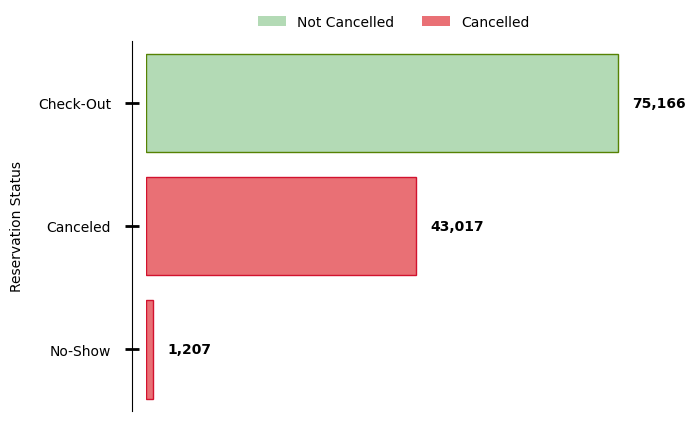

In [316]:
# Select relevant columns for analysis
data = data_eda[["reservation_status", "is_canceled"]]

# Create the figure
fig, ax = plt.subplots(1, 1)

# Construct the plot
sns.countplot(
    data=data,
    y="reservation_status",
    hue="is_canceled",
    palette=[CustomColor.light_green, CustomColor.light_red],
    ax=ax,
)

# Modify the labels
ax.set_xlabel("")
ax.set_ylabel("Reservation Status", labelpad=10)

# Modfiy the ticks
ax.set_xticks([], [])
ax.tick_params(length=10, width=2, direction="inout", pad=10)

# Modify the legend
handles, labels = ax.get_legend_handles_labels()
labels = ["Not Cancelled", "Cancelled"]
ax.legend(handles, labels, frameon=False, ncols=2, loc="lower center", bbox_to_anchor=(0.5, 1))

# Modify the spines
ax.spines[["top", "right", "bottom"]].set_visible(False)
ax.spines["left"].set_position(("outward", 10))

# Add bar annotation
[ax.bar_label(container, label_type="edge", padding=10, fmt="{:,.0f}", weight="bold") for container in ax.containers]

# Modify edge color
for idx, patch in enumerate(ax.patches[:3]):
    if idx == 0:
        patch.set_edgecolor(CustomColor.dark_green)
    else:
        patch.set_edgecolor(CustomColor.dark_red)

# Render the plot
plt.show()

In [317]:
data_cleaned = data_eda.drop(columns="reservation_status")